# Corelatia dintre Pret si Rating in Jocurile Video de pe Steam

Scopul acestui proiect este sa analizez daca pretul unui joc video influenteaza rating-ul primit de la utilizatori. Voi folosi un set de date cu jocuri de pe Steam si voi calcula corelatia Pearson intre coloanele `price` si `rating`.

Ma voi folosi de:
- `pandas` pentru manipularea datelor si pentru vizualizare (histograme si scatter plots);
- `scipy.stats.pearsonr` pentru analiza corelatiei.


In [1]:
import pandas as pd
from scipy.stats import pearsonr #libraria ce faciliteaza calculul indicelui pearson intre cele doua variabile

df = pd.read_csv("steam_games.csv") # datele a primelor 500 de jocuri de pe steam clasificate dupa rating

df.head() # afisez primele 5 randuri


,price,rating
0,14.99,8.87
1,9.99,8.85
2,9.99,8.82
3,9.99,8.81
4,9.99,8.80


## Explorarea setului de date

Ma uit la primele randuri pentru a vedea structura datelor. In acest caz, coloanele importante sunt:
- `price`: pretul jocului (in dolari)
- `rating`: scorul de evaluare al jocului (intre 1 si 10)

Verific si tipurile de date si daca sunt valori lipsa.


In [2]:
df.info() # verific informatii despre tipuri si valori lipsa

df = df[['price', 'rating']] # selectez doar coloanele necesare (util pentru in cazul in care am coloane extra irelevante pentru scopul acestui proiect)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   500 non-null    float64
 1   rating  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Curatarea datelor

- Eliminam valorile lipsa (daca exista)
- Eliminam jocurile gratuite (`price == 0`) deoarece pot distorsiona analiza


In [3]:
df = df.dropna()
df = df[df['price'] > 0]

df.describe() # verific structura dupa curatare


,price,rating
count,444.000000,444.000000
mean,18.569775,8.573243
std,12.784531,0.090802
min,0.790000,8.470000
25%,9.990000,8.500000
50%,14.990000,8.550000
75%,20.990000,8.630000
max,59.990000,8.870000


## Vizualizarea distributiei variabilelor

Voi folosi metodele integrate din pandas pentru:
- Histograma preturilor
- Histograma rating-urilor
- Scatter plot: Pret vs Rating


Text(0, 0.5, 'Frecventa')

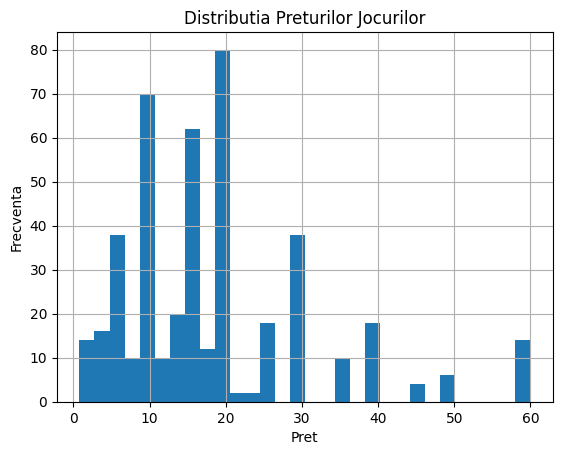

In [13]:
# Histograma pentru preturi
ax1 = df['price'].hist(bins=30)
ax1.set_title("Distributia Preturilor Jocurilor")
ax1.set_xlabel("Pret")
ax1.set_ylabel("Frecventa")


Text(0, 0.5, 'Frecventa')

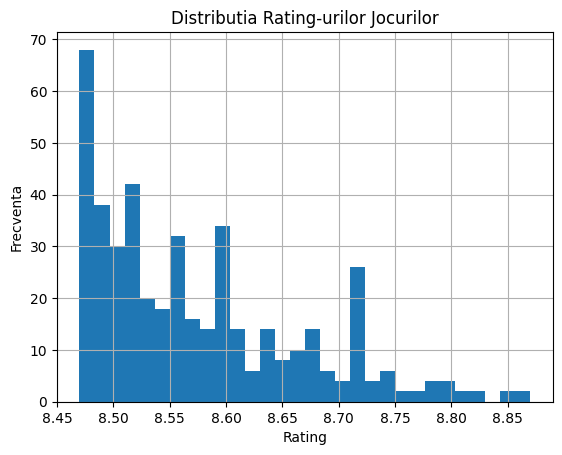

In [8]:
# Histograma pentru rating-uri
ax2 = df['rating'].hist(bins=30)
ax2.set_title("Distributia Rating-urilor Jocurilor")
ax2.set_xlabel("Rating")
ax2.set_ylabel("Frecventa")

## Ce este coeficientul de corelatie Pearson?

Coeficientul Pearson (`r`) masoara **relatia liniara** dintre doua variabile numerice. El este un numar intre **-1 si +1**:

| Valoare r        | Interpretare                                              |
|------------------|-----------------------------------------------------------|
| **+1**           | Corelatie perfect pozitiva *(pretul creste, rating-ul creste mereu)* |
| **+0.7 → +0.9**  | Corelatie puternica pozitiva                              |
| **+0.3 → +0.7**  | Corelatie moderata pozitiva                               |
| **0 → +0.3**     | Corelatie slaba pozitiva                                  |
| **0**            | Nicio corelatie (nu exista o relatie liniara)             |
| **-0.3 → 0**     | Corelatie slaba negativa                                  |
| **-0.7 → -0.3**  | Corelatie moderata negativa                               |
| **-0.9 → -0.7**  | Corelatie puternica negativa                              |
| **-1**           | Corelatie perfect negativa *(pretul creste, rating-ul scade mereu)* |

---

Pe langa coeficient, obtinem si **p-value**, care ne spune daca relatia este **semnificativa statistic**.  
Daca `p < 0.05`, inseamna ca relatia observata este **probabil reala** si **nu doar o coincidenta**.


In [6]:
correlation, p_value = pearsonr(df['price'], df['rating'])
print(f"Coeficientul Pearson: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")


Coeficientul Pearson: 0.0401
P-value: 0.3992


## Scatter plot: Pret vs Rating

Graficul de tip scatter ne ajuta sa vedem vizual daca exista o tendinta intre pretul jocului si rating-ul primit.  
O posibila relatie liniara ar aparea sub forma unui nor de puncte aliniate pe o diagonala (in sus sau in jos).

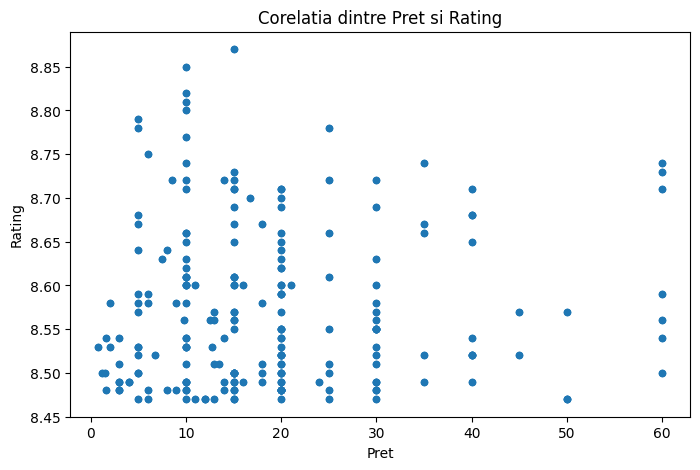

In [7]:
import matplotlib.pyplot as plt  # doar pentru etichete si afisare

# scatter plot pret versus rating
df.plot.scatter(x='price', y='rating', figsize=(8, 5), title='Corelatia dintre Pret si Rating')
plt.xlabel('Pret')
plt.ylabel('Rating')
plt.show()

## Concluzie

In urma analizei, am obtinut:
- `r` ≈ 0.01 → aproape 0 → **nu exista o relatie liniara** intre pret si rating
- `p-value` ≈ 0.82 → mult mai mare decat 0.05 → **rezultatul nu este semnificativ statistic**

🔍 Asta inseamna ca **pretul unui joc nu este un bun indicator al rating-ului sau**, cel putin pe baza acestui esantion de date.
